<a href="https://colab.research.google.com/github/mherbert93/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
import pandas as pd

df = pd.DataFrame({'data': [1,3,2,4,3,5]})

df.head()

,data
0,1
1,3
2,2
3,4
4,3


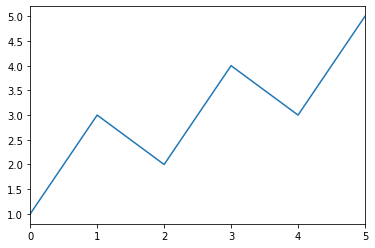

In [2]:
df['data'].plot();

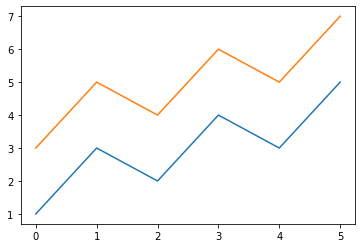

In [3]:
import matplotlib.pyplot as plt
data = [1,3,2,4,3,5]
data2 = [3,5,4,6,5,7]
plt.plot(data)
plt.plot(data2)
plt.show()

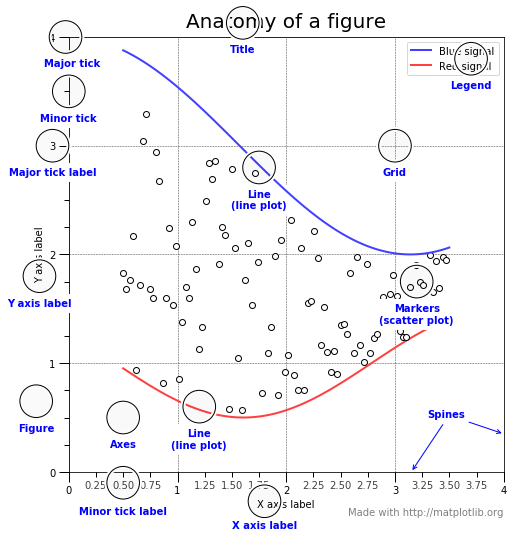

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

In [5]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

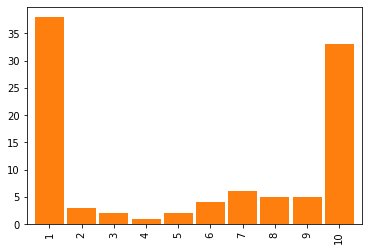

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1, 11))

fake.plot.bar(color='C1', width=0.9);

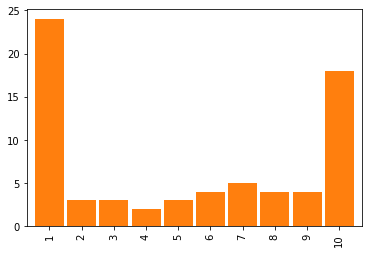

In [7]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

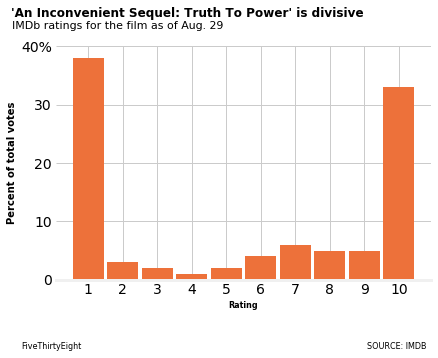

In [36]:
fig, ax = plt.subplots()

plt.style.use('fivethirtyeight')

# Add bars
ax.bar(height=fake, x=range(1,11,1), color='#ED713A', width=.9)

# Set Title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", x=.35, y=1.1, fontsize=12, fontweight="bold")

# Set Subtitle
ax.text(s="IMDb ratings for the film as of Aug. 29", y=43, x=-1.2, fontsize=11)

# Set xticks
ax.set_xticks(range(1,11,1))

# Set yticks
ax.set_yticks(range(0,50,10))
# ax.set_xticks([1,2,3,4,5,6,7,8,9,10])

# Set ytick labels
ax.set_yticklabels(['0','10','20','30','40%'])

# Set x label
ax.set_xlabel("Rating", color='black', fontsize=8, fontweight='bold')

# Set y label
ax.set_ylabel("Percent of total votes", color='black', fontsize=10, fontweight='bold')

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

ax.grid(True)

fig.text(0, -0.17, "FiveThirtyEight", size=8)
fig.text(0.80, -0.17, "SOURCE: IMDB", size=8)

#ax.axhline(y=-5, color='#5e5e5e')

plt.show()

In [9]:
list(range(1,51,10))

[1, 11, 21, 31, 41]

In [10]:
display(example)

# Part 2

In [11]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2018/10/actblue-1.png?w=575'
example = Image(url=url, width=400)

display(example)

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/actblue-analysis/master/data/actblue_contribs_by_cycle.csv')

df.head()

,cycle,count,sum
0,2014.0,3361213,1.139513e+08
1,2016.0,6747187,2.221072e+08
2,2018.0,15272992,5.636850e+08


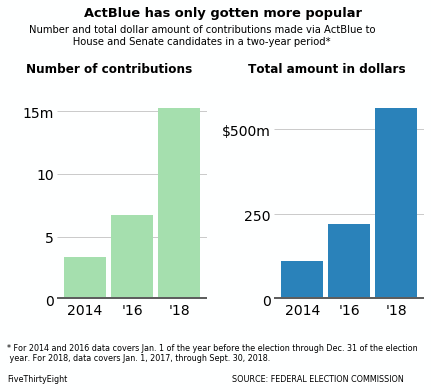

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

plt.style.use('fivethirtyeight')

ax1.bar(height=df['count'], x=df['cycle'], color='#a5dfae', width=1.8)
ax2.bar(height=df['sum'], x=df['cycle'], color='#2a82ba', width=1.8)

ax1.set_title("Number of contributions", x=.35, y=1.1, fontsize=12, fontweight="bold")
ax2.set_title("Total amount in dollars", x=.35, y=1.1, fontsize=12, fontweight="bold")

ax.text(s="IMDb ratings for the film as of Aug. 29", y=42, x=-1.2, fontsize=12)

fig.suptitle('ActBlue has only gotten more popular', y=1.13, weight='bold', fontsize=13) 
fig.text(0.05, 1.00, "Number and total dollar amount of contributions made via ActBlue to \n              House and Senate candidates in a two-year period*", size=10)




ax1.set_yticks([0, 5000000, 10000000, 15000000])
ax2.set_yticks([0, 250000000, 500000000])

ax1.set_yticklabels(['0','5','10','15m'])
ax2.set_yticklabels(['0','250','$500m'])

ax1.set_xticks([2014, 2016, 2018])
ax2.set_xticks([2014, 2016, 2018])
ax1.set_xticklabels(["2014", "'16", "'18"])
ax2.set_xticklabels(["2014", "'16", "'18"])



ax1.grid(False, axis='x')
ax2.grid(False, axis='x')

ax1.set_frame_on(False)
ax2.set_frame_on(False)


fig.set_facecolor(color="#feffff")

ax1.set_facecolor(color="#feffff")
ax2.set_facecolor(color="#feffff")

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax1.axhline(y=1, color='#5e5e5e')
ax2.axhline(y=1, color='#5e5e5e')


fig.text(0, -0.10, "* For 2014 and 2016 data covers Jan. 1 of the year before the election through Dec. 31 of the election \n year. For 2018, data covers Jan. 1, 2017, through Sept. 30, 2018.", size=8)
fig.text(0, -0.17, "FiveThirtyEight", size=8)
fig.text(0.52, -0.17, "SOURCE: FEDERAL ELECTION COMMISSION", size=8)

fig.tight_layout()

plt.show()


In [14]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2018/10/actblue-1.png?w=575'
example = Image(url=url, width=400)

display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here